In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from hyperdt.tree import HyperbolicDecisionTreeClassifier, HyperbolicDecisionTreeRegressor
from hyperdt.ensemble import HyperbolicRandomForestClassifier, HyperbolicRandomForestRegressor
from hyperdt.xgboost import HyperbolicXGBoostClassifier, HyperbolicXGBoostRegressor
from hyperdt.oblique import HyperbolicContinuouslyOptimizedClassifier, HyperbolicHouseHolderClassifier, HyperbolicContinuouslyOptimizedRegressor, HyperbolicHouseHolderRegressor

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Benchmark table

In [ ]:
import numpy as np
import pandas as pd

from hyperdt.toy_data import wrapped_normal_mixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

from tqdm import tqdm

N_CLASSES = 8
N_POINTS = 1000
N_TRIALS = 100
DIMS = [2, 4, 8, 16, 32, 64, 128]

# Hyperparameters
MAX_DEPTH = 3
N_ESTIMATORS = 12

## Classification

In [44]:
MODELS = {
    "LorentzDT": (DecisionTreeClassifier, {"max_depth": MAX_DEPTH, "min_samples_split": 2, "min_samples_leaf": 1}),
    "LorentzRF": (RandomForestClassifier, {"max_depth": MAX_DEPTH, "min_samples_split": 2, "min_samples_leaf": 1, "n_estimators": N_ESTIMATORS, "n_jobs": -1}),
    "KleinDT":   (HyperbolicDecisionTreeClassifier, {"max_depth": MAX_DEPTH, "min_samples_split": 2, "min_samples_leaf": 1, "midpoint_method": "naive", "validate_input_geometry": False}),
    "KleinRF": (HyperbolicRandomForestClassifier, {"max_depth": MAX_DEPTH, "min_samples_split": 2, "min_samples_leaf": 1, "n_estimators": N_ESTIMATORS, "n_jobs": -1, "midpoint_method": "naive", "validate_input_geometry": False}),
    "HyperDT": (HyperbolicDecisionTreeClassifier, {"max_depth": MAX_DEPTH, "min_samples_split": 2, "min_samples_leaf": 1, "validate_input_geometry": False}),
    "HyperRF": (HyperbolicRandomForestClassifier, {"max_depth": MAX_DEPTH, "min_samples_split": 2, "min_samples_leaf": 1, "n_estimators": N_ESTIMATORS, "n_jobs": -1, "validate_input_geometry": False}),
    "XGBoost": (HyperbolicXGBoostClassifier, {"max_depth": MAX_DEPTH, "n_estimators": N_ESTIMATORS, "n_jobs": -1, "validate_input_geometry": False}),
    "HyperCO2": (HyperbolicContinuouslyOptimizedClassifier, {"max_depth": MAX_DEPTH, "min_samples_split": 2, "n_estimators": N_ESTIMATORS, "validate_input_geometry": False}),
    "HyperHHC": (HyperbolicHouseHolderClassifier, {"max_depth": MAX_DEPTH, "min_samples_split": 2, "n_estimators": N_ESTIMATORS, "validate_input_geometry": False}),
}

seed = -1
results = pd.DataFrame(columns=["dim", "seed", "model", "accuracy"])
my_tqdm = tqdm(total=len(MODELS) * N_TRIALS * len(DIMS))
for dim in DIMS:
    for trial in range(N_TRIALS):
        seed += 1
        split_passes = False
        while not split_passes:
            try:
                X, y = wrapped_normal_mixture(num_points=N_POINTS, num_dims=dim, seed=seed, num_classes=N_CLASSES)
                y = np.unique(y, return_inverse=True)[1]
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)
                split_passes = True
            except Exception as e:
                # print(e)
                seed += 1
                split_passes = False 

        for model_name, (model, params) in MODELS.items():
            try:
                m = model(**params)
                m.fit(X_train, y_train)
                acc = accuracy_score(y_test, m.predict(X_test))

                results.loc[len(results)] = [dim, trial, model_name, acc]
            except Exception as e:
                print(f"Error with model {model_name} on trial {trial}: {e}")

            my_tqdm.update(1)

  0%|          | 0/6300 [00:00<?, ?it/s]

100%|█████████▉| 6299/6300 [18:07<00:00,  2.35it/s]

In [45]:
results.to_csv("classification_benchmarks.csv")

## Regression

In [26]:
MODELS = {
    "LorentzDT": (DecisionTreeRegressor, {"max_depth": MAX_DEPTH, "min_samples_split": 2, "min_samples_leaf": 1}),
    "LorentzRF": (RandomForestRegressor, {"max_depth": MAX_DEPTH, "min_samples_split": 2, "min_samples_leaf": 1, "n_estimators": N_ESTIMATORS, "n_jobs": -1}),
    "KleinDT":   (HyperbolicDecisionTreeRegressor, {"max_depth": MAX_DEPTH, "min_samples_split": 2, "min_samples_leaf": 1, "midpoint_method": "naive", "validate_input_geometry": False}),
    "KleinRF": (HyperbolicRandomForestRegressor, {"max_depth": MAX_DEPTH, "min_samples_split": 2, "min_samples_leaf": 1, "n_estimators": N_ESTIMATORS, "n_jobs": -1, "midpoint_method": "naive", "validate_input_geometry": False}),
    "HyperDT": (HyperbolicDecisionTreeRegressor, {"max_depth": MAX_DEPTH, "min_samples_split": 2, "min_samples_leaf": 1, "validate_input_geometry": False}),
    "HyperRF": (HyperbolicRandomForestRegressor, {"max_depth": MAX_DEPTH, "min_samples_split": 2, "min_samples_leaf": 1, "n_estimators": N_ESTIMATORS, "n_jobs": -1, "validate_input_geometry": False}),
    "XGBoost": (HyperbolicXGBoostRegressor, {"max_depth": MAX_DEPTH, "n_estimators": N_ESTIMATORS, "n_jobs": -1, "validate_input_geometry": False}),
    "HyperCO2": (HyperbolicContinuouslyOptimizedRegressor, {"max_depth": MAX_DEPTH, "min_samples_split": 2, "n_estimators": N_ESTIMATORS, "validate_input_geometry": False}),
    "HyperHHC": (HyperbolicHouseHolderRegressor, {"max_depth": MAX_DEPTH, "min_samples_split": 2, "n_estimators": N_ESTIMATORS, "validate_input_geometry": False}),
}

seed = -1
results = pd.DataFrame(columns=["dim", "seed", "model", "accuracy"])
my_tqdm = tqdm(total=len(MODELS) * N_TRIALS * len(DIMS))
for dim in DIMS:
    for trial in range(N_TRIALS):
        seed += 1
        X, y = wrapped_normal_mixture(num_points=N_POINTS, num_dims=dim, seed=seed, num_classes=2, regression=True)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

        for model_name, (model, params) in MODELS.items():
            try:
                m = model(**params)
                m.fit(X_train, y_train)
                # acc = accuracy_score(y_test, m.predict(X_test))
                acc = mean_squared_error(y_test, m.predict(X_test))

                results.loc[len(results)] = [dim, trial, model_name, acc]
            except Exception as e:
                print(f"Error with model {model_name} on trial {trial}; seed {seed}: {e}")

            my_tqdm.update(1)

100%|██████████| 6300/6300 [18:15<00:00,  5.75it/s]

Error with model XGBoost on trial 1; seed 1: zero-size array to reduction operation minimum which has no identity


Error with model XGBoost on trial 10; seed 10: zero-size array to reduction operation minimum which has no identity


Error with model XGBoost on trial 15; seed 15: zero-size array to reduction operation minimum which has no identity


Error with model XGBoost on trial 16; seed 16: zero-size array to reduction operation minimum which has no identity


Error with model XGBoost on trial 22; seed 22: zero-size array to reduction operation maximum which has no identity


Error with model XGBoost on trial 27; seed 27: zero-size array to reduction operation minimum which has no identity


Error with model XGBoost on trial 28; seed 28: zero-size array to reduction operation minimum which has no identity


Error with model XGBoost on trial 36; seed 36: zero-size array to reduction operation minimum which has no identity


Error with model XGBoost on trial 37; seed 37: zero-size array to reduction operation minimum which has no identity


Error with model XGBoost on trial 48; seed 48: zero-size array to reduction operation minimum which has no identity


Error with model XGBoost on trial 57; seed 57: zero-size array to reduction operation maximum which has no identity


Error with model XGBoost on trial 70; seed 70: zero-size array to reduction operation minimum which has no identity


Error with model XGBoost on trial 72; seed 72: zero-size array to reduction operation maximum which has no identity


Error with model XGBoost on trial 74; seed 74: zero-size array to reduction operation minimum which has no identity


Error with model XGBoost on trial 98; seed 98: zero-size array to reduction operation minimum which has no identity


Error with model XGBoost on trial 99; seed 99: zero-size array to reduction operation maximum which has no identity


Error with model XGBoost on trial 9; seed 109: zero-size array to reduction operation maximum which has no identity


Error with model XGBoost on trial 28; seed 128: zero-size array to reduction operation minimum which has no identity


Error with model XGBoost on trial 30; seed 130: zero-size array to reduction operation minimum which has no identity


Error with model XGBoost on trial 46; seed 146: zero-size array to reduction operation maximum which has no identity


Error with model XGBoost on trial 80; seed 180: zero-size array to reduction operation minimum which has no identity


Error with model XGBoost on trial 5; seed 205: zero-size array to reduction operation minimum which has no identity


Error with model XGBoost on trial 14; seed 214: zero-size array to reduction operation maximum which has no identity


Error with model XGBoost on trial 19; seed 219: zero-size array to reduction operation minimum which has no identity


Error with model XGBoost on trial 40; seed 240: zero-size array to reduction operation minimum which has no identity


Error with model XGBoost on trial 57; seed 257: zero-size array to reduction operation minimum which has no identity


Error with model XGBoost on trial 76; seed 276: zero-size array to reduction operation maximum which has no identity


Error with model XGBoost on trial 89; seed 289: zero-size array to reduction operation minimum which has no identity


Error with model XGBoost on trial 16; seed 316: zero-size array to reduction operation minimum which has no identity


Error with model XGBoost on trial 43; seed 343: zero-size array to reduction operation maximum which has no identity


Error with model XGBoost on trial 56; seed 456: zero-size array to reduction operation minimum which has no identity


Error with model XGBoost on trial 18; seed 618: zero-size array to reduction operation maximum which has no identity


In [43]:
results.to_csv("regression_benchmarks.csv")

## Table generation

In [47]:
from IPython.display import display

# Pivot by model, group by seed; report mean of accuracy
results_agg = results.groupby(['model', 'dim'])['accuracy'].mean().unstack().T

# Conditional formatting: higher = greener
# styled_results = results_agg.style.background_gradient(cmap='Greens_r', vmax=0.03, axis=1)
styled_results = results_agg.style.background_gradient(cmap='Greens', vmin=0.25, axis=1)
styled_results

model,HyperCO2,HyperDT,HyperHHC,HyperRF,KleinDT,KleinRF,LorentzDT,LorentzRF,XGBoost
dim,,,,,,,,,
2,0.180650,0.507500,0.114400,0.543400,0.507500,0.545950,0.489850,0.496300,0.594400
4,0.166850,0.432400,0.136350,0.499900,0.432400,0.497700,0.417550,0.463500,0.596000
8,0.155850,0.374050,0.118800,0.452250,0.374100,0.452100,0.367550,0.427600,0.580650
16,0.138450,0.322700,0.134650,0.398300,0.322900,0.398200,0.321500,0.370800,0.542000
32,0.123850,0.289000,0.125800,0.352900,0.289100,0.350650,0.286600,0.329250,0.486700
64,0.131000,0.258800,0.122250,0.304150,0.258550,0.304550,0.257350,0.288950,0.410150
128,0.136900,0.255550,0.128650,0.280650,0.255650,0.281100,0.246600,0.267550,0.352050


In [51]:
# Group columns
dt_cols = ["LorentzDT", "KleinDT", "HyperDT", "HyperCO2", "HyperHHC"]
rf_cols = ["LorentzRF", "KleinRF", "HyperRF", "XGBoost"]

# Reorder columns
# results_agg_grouped = results_agg[euclidean_cols + hyperbolic_cols]
results_agg_grouped = results_agg[dt_cols + rf_cols]

# Add multi-index for column grouping
results_agg_grouped.columns = pd.MultiIndex.from_tuples(
    # [('Euclidean', col) if col in euclidean_cols else ('Hyperbolic', col) for col in results_agg_grouped.columns]
    [("Decision Trees", col) if col in dt_cols else ("Random Forests", col) for col in results_agg_grouped.columns]
)
results_agg_grouped *= 100

# Export to LaTeX with styling
latex_table = results_agg_grouped.style.background_gradient(
    # cmap='Greens_r', axis=1, vmax=0.03
    cmap="Greens", axis=1, vmin=25
    ).format(
        "{:.2f}"
    ).to_latex(convert_css=True)

# Save to file or display
with open("images/benchmark_results_table_regression.tex", "w") as f:
    f.write(latex_table)

print(latex_table)

\begin{tabular}{lrrrrrrrrr}
 & \multicolumn{5}{r}{Decision Trees} & \multicolumn{4}{r}{Random Forests} \\
 & LorentzDT & KleinDT & HyperDT & HyperCO2 & HyperHHC & LorentzRF & KleinRF & HyperRF & XGBoost \\
dim &  &  &  &  &  &  &  &  &  \\
2 & {\cellcolor[HTML]{2F984F}} \color[HTML]{F1F1F1} 48.98 & {\cellcolor[HTML]{238B45}} \color[HTML]{F1F1F1} 50.75 & {\cellcolor[HTML]{238B45}} \color[HTML]{F1F1F1} 50.75 & {\cellcolor[HTML]{F7FCF5}} \color[HTML]{000000} 18.07 & {\cellcolor[HTML]{F7FCF5}} \color[HTML]{000000} 11.44 & {\cellcolor[HTML]{2B934B}} \color[HTML]{F1F1F1} 49.63 & {\cellcolor[HTML]{05712F}} \color[HTML]{F1F1F1} 54.59 & {\cellcolor[HTML]{067230}} \color[HTML]{F1F1F1} 54.34 & {\cellcolor[HTML]{00441B}} \color[HTML]{F1F1F1} 59.44 \\
4 & {\cellcolor[HTML]{7AC77B}} \color[HTML]{000000} 41.76 & {\cellcolor[HTML]{6ABF71}} \color[HTML]{000000} 43.24 & {\cellcolor[HTML]{6ABF71}} \color[HTML]{000000} 43.24 & {\cellcolor[HTML]{F7FCF5}} \color[HTML]{000000} 16.68 & {\cellcolor[HTML]{F7FCF

# Timing benchmarks

In [ ]:
# Timing benchmarks
from hyperdt.legacy.tree import HyperbolicDecisionTreeClassifier as OldHyperDT
from hyperdt.toy_data import wrapped_normal_mixture
from time import time
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

N_TRIALS = 10

times = pd.DataFrame(columns=["model", "n_samples", "trial", "time"])
samples_arr = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1_024, 2_048, 4_096, 8_192, 16_384, 32_768]
my_tqdm = tqdm(total=len(samples_arr) * N_TRIALS)

for n_samples in samples_arr:
    # print(n_samples, end=" ")
    my_tqdm.set_description(f"Processing {n_samples} samples")
    for trial in range(N_TRIALS):
        hdt = OldHyperDT(max_depth=3)
        fhdt = HyperbolicDecisionTreeClassifier(max_depth=3)

        X, y = wrapped_normal_mixture(n_samples)

        t1 = time()
        fhdt.fit(X, y)
        t2 = time() - t1
        times.loc[len(times)] = ["Fast-HyperDT", n_samples, trial, t2]

        t3 = time()
        hdt.fit(X, y)
        t4 = time() - t3
        times.loc[len(times)] = ["HyperDT", n_samples, trial, t4]

        my_tqdm.update(1)

Processing 32768 samples: 100%|██████████| 150/150 [32:32<00:00, 131.66s/it]

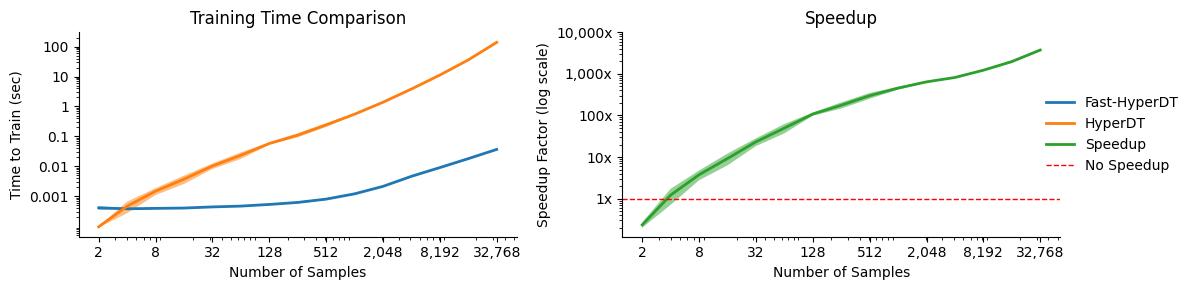

In [ ]:
import numpy as np

# times.to_csv("times.csv")
times = pd.read_csv("times.csv")

times_agg = times.groupby(["model", "n_samples"]).mean()
times_ci = 1.96 * times.groupby(["model", "n_samples"])["time"].std() / (times.groupby(["model", "n_samples"])["time"].count() ** 0.5)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 3))
ax0.plot(times_agg.xs("Fast-HyperDT", level="model").index, times_agg.xs("Fast-HyperDT", level="model")["time"], label='Fast-HyperDT', lw=2)
ax0.fill_between(
    times_agg.xs("Fast-HyperDT", level="model").index,
    times_agg.xs("Fast-HyperDT", level="model")["time"] - times_ci.xs("Fast-HyperDT", level="model"),
    times_agg.xs("Fast-HyperDT", level="model")["time"] + times_ci.xs("Fast-HyperDT", level="model"),
    alpha=0.5, edgecolor="none"
)
ax0.plot(times_agg.xs("HyperDT", level="model").index, times_agg.xs("HyperDT", level="model")["time"], label='HyperDT', lw=2)
ax0.fill_between(
    times_agg.xs("HyperDT", level="model").index,
    times_agg.xs("HyperDT", level="model")["time"] - times_ci.xs("HyperDT", level="model"),
    times_agg.xs("HyperDT", level="model")["time"] + times_ci.xs("HyperDT", level="model"),
    alpha=0.5, edgecolor="none"
)
ax0.set_xlabel('Number of Samples')
ax0.set_ylabel('Time to Train (sec)')
ax0.set_yscale("log")
ax0.set_xscale("log")
ax0.set_xticks([2, 8, 32, 128, 512, 2048, 8192, 32768])
ax0.set_xticklabels(["2", "8", "32", "128", "512", "2,048", "8,192", "32,768"])
ax0.set_yticks([0.001, 0.01, 0.1, 1, 10, 100])
ax0.set_yticklabels(["0.001", "0.01", "0.1", "1", "10", "100"])
ax0.set_title('Training Time Comparison')

# Calculate speedup and its confidence interval using error propagation
hyper_times = times_agg.xs("HyperDT", level="model")["time"]
fast_times = times_agg.xs("Fast-HyperDT", level="model")["time"]
times_speedup = hyper_times / fast_times

hyper_std = times_ci.xs("HyperDT", level="model")
fast_std = times_ci.xs("Fast-HyperDT", level="model")
# Error propagation formula for division
times_speedup_ci = times_speedup * np.sqrt((hyper_std/hyper_times)**2 + (fast_std/fast_times)**2)

ax1.plot(times_speedup.index, times_speedup, label='Speedup', lw=2, c="C2")
ax1.fill_between(
    times_speedup.index,
    times_speedup - times_speedup_ci,
    times_speedup + times_speedup_ci,
    alpha=0.5,
    color='C2', edgecolor="none", 
)
ax1.set_title('Speedup')
ax1.set_xlabel('Number of Samples')
ax1.set_ylabel('Fast-HyperDT Speedup Factor')
ax1.axhline(y=1, color='r', linestyle='--', label='No Speedup', lw=1)
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xticks([2, 8, 32, 128, 512, 2048, 8192, 32768])
ax1.set_xticklabels(["2", "8", "32", "128", "512", "2,048", "8,192", "32,768"])
ax1.set_ylabel('Speedup Factor (log scale)')
ax1.set_yticks([1, 10, 100, 1000, 10000])
ax1.set_yticklabels(["1x", "10x", "100x", "1,000x", "10,000x"])

for ax in [ax0, ax1]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# collect all handles/labels from both axes
handles, labels = [], []
for ax in (ax0, ax1):
    h, l = ax.get_legend_handles_labels()
    handles += h
    labels += l

# place a single legend at the right
ax1.legend(handles, labels, loc='center right', shadow=False, frameon=False, bbox_to_anchor=(1.3, 0.5))

plt.tight_layout()
plt.savefig("images/speed_comparison.pdf", bbox_inches='tight', dpi=300)
plt.show()